In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor/2/1231.png
/kaggle/input/brain-tumor/2/641.png
/kaggle/input/brain-tumor/2/1088.png
/kaggle/input/brain-tumor/2/173.png
/kaggle/input/brain-tumor/2/1958.png
/kaggle/input/brain-tumor/2/815.png
/kaggle/input/brain-tumor/2/491.png
/kaggle/input/brain-tumor/2/1924.png
/kaggle/input/brain-tumor/2/1084.png
/kaggle/input/brain-tumor/2/718.png
/kaggle/input/brain-tumor/2/709.png
/kaggle/input/brain-tumor/2/889.png
/kaggle/input/brain-tumor/2/379.png
/kaggle/input/brain-tumor/2/780.png
/kaggle/input/brain-tumor/2/248.png
/kaggle/input/brain-tumor/2/94.png
/kaggle/input/brain-tumor/2/480.png
/kaggle/input/brain-tumor/2/1145.png
/kaggle/input/brain-tumor/2/1944.png
/kaggle/input/brain-tumor/2/236.png
/kaggle/input/brain-tumor/2/1343.png
/kaggle/input/brain-tumor/2/771.png
/kaggle/input/brain-tumor/2/675.png
/kaggle/input/brain-tumor/2/340.png
/kaggle/input/brain-tumor/2/48.png
/kaggle/input/brain-tumor/2/1948.png
/kaggle/input/brain-tumor/2/1878.png
/kaggle/input/brain-

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
print(os.listdir('/kaggle/input/brain-tumor'))

['2', '3', '1']


In [4]:
data_dir = '/kaggle/input/brain-tumor'

In [5]:
print(os.listdir(data_dir))

['2', '3', '1']


In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [7]:
print(os.listdir('/kaggle/input/brain-tumor/2')[0:7])

['1231.png', '641.png', '1088.png', '173.png', '1958.png', '815.png', '491.png']


In [8]:
prueba=cv2.imread('/kaggle/input/brain-tumor/2/641.png')

In [9]:
prueba.shape

(512, 512, 3)

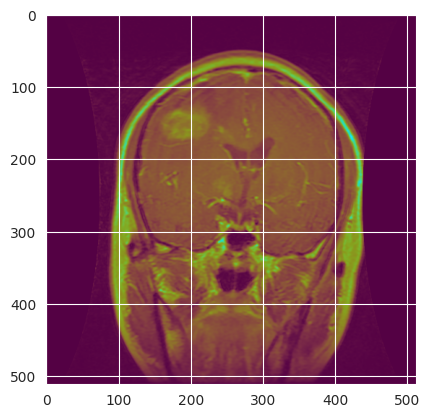

In [10]:
plt.imshow(prueba)

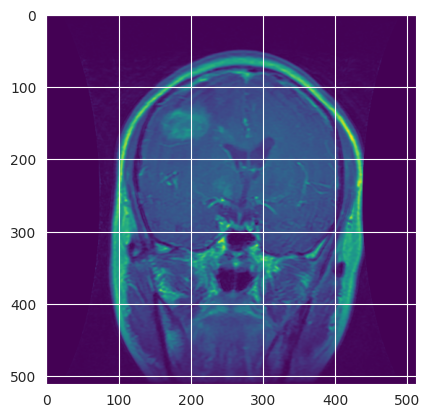

In [11]:
prueba_1= cv2.cvtColor(prueba, cv2.COLOR_RGB2BGR)
plt.imshow(prueba_1)

In [12]:
prueba_1.shape

(512, 512, 3)

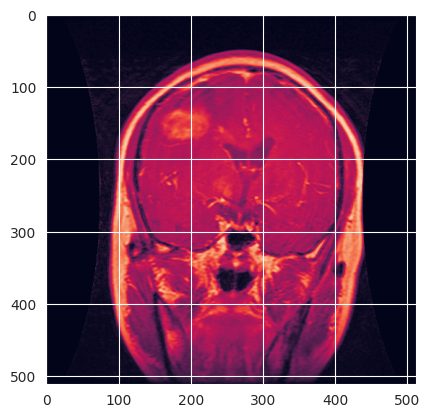

In [13]:
prueba_2 = cv2.cvtColor(prueba, cv2.COLOR_RGB2GRAY)
plt.imshow(prueba_2)

In [14]:
prueba_2.shape

(512, 512)

In [15]:
# Generate data paths with labels
filepaths_2=[]
labels_2=[]
def define_paths(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            filepaths_2.append(fpath)
            if fold == '1':
                labels.append('meningioma')
                labels_2.append('meningioma')
            elif fold == '2':
                labels.append('glioma')
                labels_2.append('glioma')
            elif fold == '3':
                labels.append('pituitary tumor')
                labels_2.append('pituitary tumor')

    return filepaths, labels

In [16]:
print(define_paths(data_dir)[0][7]),print(define_paths(data_dir)[1][7])

/kaggle/input/brain-tumor/2/1924.png
glioma


(None, None)

In [17]:
filepaths_2[7],labels_2[7]

('/kaggle/input/brain-tumor/2/1924.png', 'glioma')

In [18]:
len(filepaths_2),len(labels_2)

(6128, 6128)

In [19]:
datos=np.array([filepaths_2,labels_2])

df=pd.DataFrame(data=[datos[0],datos[1]]).T
df.columns=['images','tipos']

In [20]:
df.head(7),df.tail(7)

(                                 images   tipos
 0  /kaggle/input/brain-tumor/2/1231.png  glioma
 1   /kaggle/input/brain-tumor/2/641.png  glioma
 2  /kaggle/input/brain-tumor/2/1088.png  glioma
 3   /kaggle/input/brain-tumor/2/173.png  glioma
 4  /kaggle/input/brain-tumor/2/1958.png  glioma
 5   /kaggle/input/brain-tumor/2/815.png  glioma
 6   /kaggle/input/brain-tumor/2/491.png  glioma,
                                     images       tipos
 6121  /kaggle/input/brain-tumor/1/2964.png  meningioma
 6122  /kaggle/input/brain-tumor/1/2652.png  meningioma
 6123  /kaggle/input/brain-tumor/1/3029.png  meningioma
 6124  /kaggle/input/brain-tumor/1/2383.png  meningioma
 6125  /kaggle/input/brain-tumor/1/2627.png  meningioma
 6126  /kaggle/input/brain-tumor/1/2392.png  meningioma
 6127  /kaggle/input/brain-tumor/1/2995.png  meningioma)

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import ipywidgets
import jupyterlab_widgets
from tqdm.auto import tqdm
# Ignore Warnings
import warnings
import time
warnings.filterwarnings("ignore")

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [23]:
class SIMPLeCNN(nn.Module):
    def __init__(self):
        super(SIMPLeCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 3)  # 3 classes: glioma, meningioma, pituitary tumor
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x
        
        
   

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to a consistent size
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.,), (1.,))  # Normalize image tensors
])

# Load the dataset
dataset = ImageFolder("/kaggle/input/brain-tumor", transform=transform)
display(dataset)

Dataset ImageFolder
    Number of datapoints: 3064
    Root location: /kaggle/input/brain-tumor
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.0,), std=(1.0,))
           )

In [25]:
print(len(dataset))
class_names=dataset.classes
print(class_names)
print(len(class_names))

3064
['1', '2', '3']
3


In [26]:
# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Create an instance of the CNN model
model = SIMPLeCNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=5)


# Training loop
num_epochs = 27

tracking_loss={}
tracking_loss_eval={}
tracking_correct_eval={}
LOSS_TRAIN=[]
LOSS_EVAL=[]
ACCU_TRAIN=[]
ACCU_EVAL=[]
valid_min_loss=np.Inf
valid_min_accu=0

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    correct_train = 0.0
    correct_eval = 0.0
    # Training
    model.train()
    loop = tqdm(enumerate(train_loader), total = len(train_loader), bar_format=f"Epoch [{epoch+1}".ljust(9) + f"/ {num_epochs}]\t" + '{bar}{r_bar}')
    for batch_idx, (images, labels) in loop:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Progress bar version kontrimnon
        loop.set_postfix(loss = loss.item())
        # Update train_loss
        train_loss += loss.item() * images.size(0)
        tracking_loss[(epoch, batch_idx)] = float(train_loss)
        LOSS_TRAIN.append(train_loss)
        _,predicted=torch.max(outputs.data,1)
        correct_train+=(predicted==labels).sum().item()
        ACCU_TRAIN.append(correct_train)
        loss.backward()
        optimizer.step()

        
    scheduler.step()
    # Validation
    model.eval()
    with torch.no_grad():
        #loop=tqdm(enumerate(val_loader),total=len(val_loader), bar_format=f"Epoch [{epoch+1}".ljust(9) + f"/ {num_epochs}]\t" + '{bar}{r_bar}')
        #for batch_idx,( images, labels) in loop:
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            tracking_loss_eval[(epoch,batch_idx)]=float(val_loss)
            LOSS_EVAL.append(val_loss)
            _, predicted = torch.max(outputs.data, 1)
            #predicted = outputs.argmax(dim=1, keepdim=True)
            correct_eval += (predicted == labels).sum().item()
            tracking_correct_eval[(epoch,batch_idx)]=float(correct_eval)
            ACCU_EVAL.append(correct_eval)
            if val_loss<valid_min_loss:
                value=epoch
                valid_min_loss=val_loss
                torch.save(model.state_dict(), 'model_1.pt')
            
            
    
    train_loss = train_loss / len(train_dataset)
    val_loss = val_loss / len(val_dataset)
    accuracy = correct_eval / len(val_dataset)
    # Print the loss and the accuracy of kontrimnon
    print(f"Train Loss (final): {train_loss:.4f} | Val Loss: {val_loss:.4f} | Accuracy: {accuracy * 100:.4f}%")

Epoch [1 / 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.8702 | Val Loss: 0.6534 | Accuracy: 69.3312%


Epoch [2 / 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.5820 | Val Loss: 0.5380 | Accuracy: 75.6933%


Epoch [3 / 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.4804 | Val Loss: 0.4456 | Accuracy: 81.2398%


Epoch [4 / 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.4140 | Val Loss: 0.4218 | Accuracy: 81.4029%


Epoch [5 / 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.3853 | Val Loss: 0.4148 | Accuracy: 82.5449%


Epoch [6 / 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.3767 | Val Loss: 0.4148 | Accuracy: 82.5449%


Epoch [7 / 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.3784 | Val Loss: 0.4151 | Accuracy: 83.3605%


Epoch [8 / 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.3786 | Val Loss: 0.4065 | Accuracy: 82.3817%


Epoch [9 / 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.3755 | Val Loss: 0.3833 | Accuracy: 84.1762%


Epoch [10/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.3559 | Val Loss: 0.3603 | Accuracy: 85.1550%


Epoch [11/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.3415 | Val Loss: 0.4338 | Accuracy: 81.4029%


Epoch [12/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.2971 | Val Loss: 0.3271 | Accuracy: 85.9706%


Epoch [13/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.2409 | Val Loss: 0.2959 | Accuracy: 87.7651%


Epoch [14/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.2179 | Val Loss: 0.3003 | Accuracy: 88.0914%


Epoch [15/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1795 | Val Loss: 0.2794 | Accuracy: 89.2333%


Epoch [16/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1702 | Val Loss: 0.2794 | Accuracy: 89.2333%


Epoch [17/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1718 | Val Loss: 0.2740 | Accuracy: 90.0489%


Epoch [18/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1763 | Val Loss: 0.2904 | Accuracy: 89.2333%


Epoch [19/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1791 | Val Loss: 0.3260 | Accuracy: 85.3181%


Epoch [20/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1872 | Val Loss: 0.2670 | Accuracy: 89.2333%


Epoch [21/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1925 | Val Loss: 0.2630 | Accuracy: 89.5595%


Epoch [22/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1259 | Val Loss: 0.4159 | Accuracy: 84.0131%


Epoch [23/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1079 | Val Loss: 0.2366 | Accuracy: 91.0277%


Epoch [24/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0771 | Val Loss: 0.2369 | Accuracy: 90.7015%


Epoch [25/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0583 | Val Loss: 0.2123 | Accuracy: 92.0065%


Epoch [26/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0558 | Val Loss: 0.2123 | Accuracy: 92.0065%


Epoch [27/ 27]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0538 | Val Loss: 0.2145 | Accuracy: 92.3328%


In [27]:
LOSS_TRAIN[0:7]

[35.288692474365234,
 69.73889923095703,
 103.14278793334961,
 136.00745010375977,
 176.7946319580078,
 212.10926818847656,
 246.16666793823242]

In [28]:
valid_min_loss, val_loss

(2.4320127964019775, 0.21451380455085542)

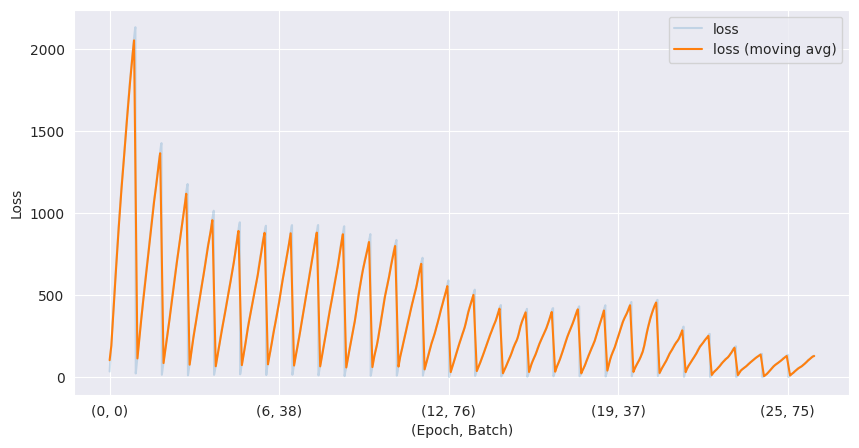

In [29]:
tracking_loss = pd.Series(tracking_loss)

plt.figure(figsize=(10, 5))
tracking_loss.plot(alpha=0.2, label="loss")
tracking_loss.rolling(center=True, min_periods=1, window=10).mean().plot(
    label="loss (moving avg)"
)
plt.xlabel("(Epoch, Batch)")
plt.ylabel("Loss")
plt.legend(loc=0)

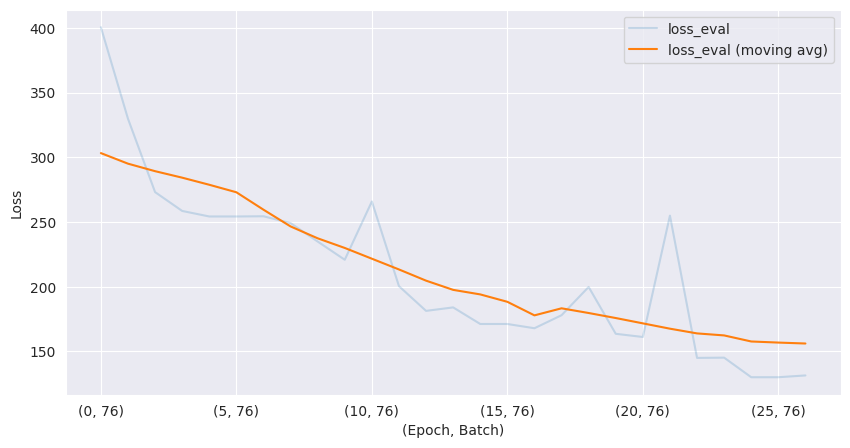

In [30]:
tracking_loss_eval = pd.Series(tracking_loss_eval)

plt.figure(figsize=(10, 5))
tracking_loss_eval.plot(alpha=0.2, label="loss_eval")
tracking_loss_eval.rolling(center=True, min_periods=1, window=10).mean().plot(
    label="loss_eval (moving avg)"
)
plt.xlabel("(Epoch, Batch)")
plt.ylabel("Loss")
plt.legend(loc=0)

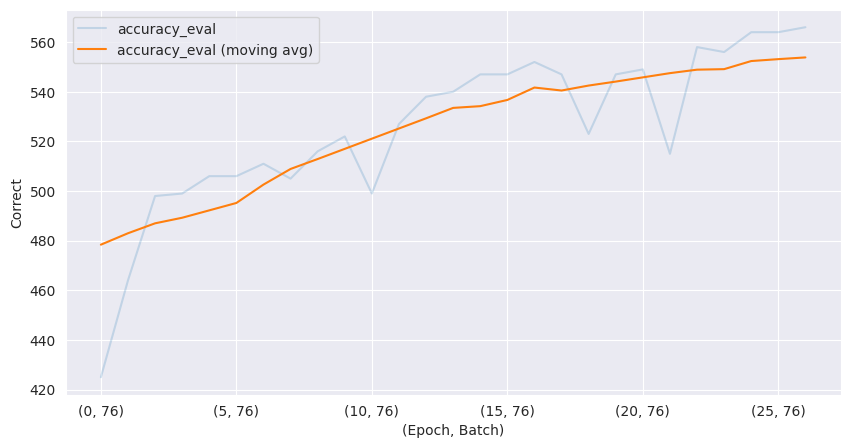

In [31]:
tracking_correct_eval = pd.Series(tracking_correct_eval)

plt.figure(figsize=(10, 5))
tracking_correct_eval.plot(alpha=0.2, label="accuracy_eval")
tracking_correct_eval.rolling(center=True, min_periods=1, window=10).mean().plot(
    label="accuracy_eval (moving avg)"
)
plt.xlabel("(Epoch, Batch)")
plt.ylabel("Correct")
plt.legend(loc=0)

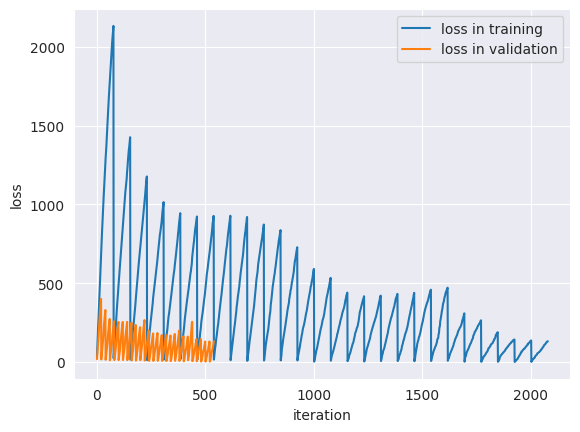

In [32]:
plt.plot(LOSS_TRAIN, label='loss in training')
plt.plot(LOSS_EVAL, label='loss in validation')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend()

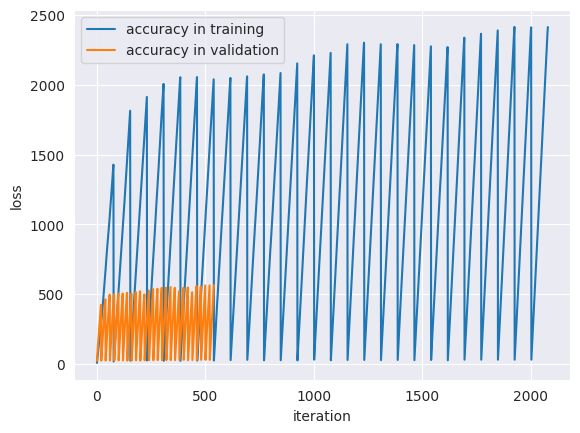

In [33]:
plt.plot(ACCU_TRAIN, label='accuracy in training')
plt.plot(ACCU_EVAL, label='accuracy in validation')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend()

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:

model.load_state_dict(torch.load('model_1.pt'))

<All keys matched successfully>

                 precision    recall  f1-score   support

         glioma     0.8353    0.8875    0.8606       160
     meningioma     0.9427    0.9069    0.9244       290
pituitary tumor     0.9817    0.9877    0.9847       163

       accuracy                         0.9233       613
      macro avg     0.9199    0.9274    0.9232       613
   weighted avg     0.9250    0.9233    0.9238       613



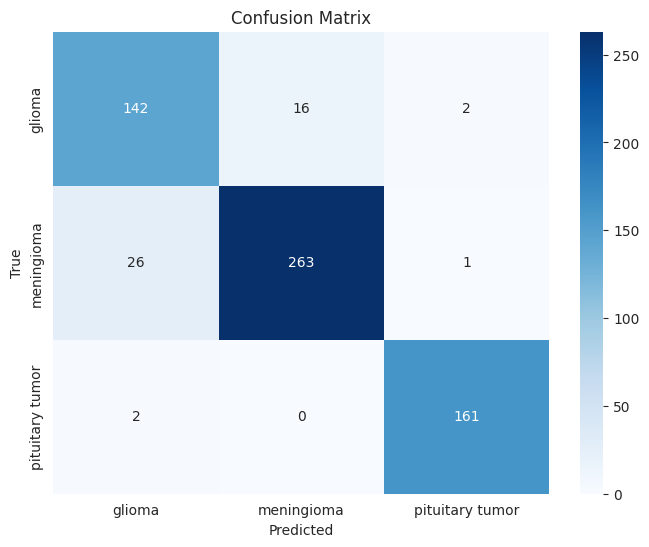

In [36]:
# Evaluation loop
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())
# Create confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Define class labels
class_labels = ['glioma', 'meningioma', 'pituitary tumor']
print(classification_report(true_labels,predictions,target_names=class_labels,digits=4))
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()